# Qubit encodings

In [1]:
import matplotlib.pyplot as plt
import qsvm4eo
import numpy as np

## Load the data

In [2]:
n_features = 4
x_train, y_train, x_test, y_test = qsvm4eo.load_data(
    data_path="..", num_features=n_features, scale_features=True
    )

## Convert the data to qubit coordinates

In [3]:
encoding = qsvm4eo.RadialEncoding(max_feature=np.max(x_train), shift=1., scaling=5.4, n_features=n_features)

qbits_train = [encoding.encode(x) for x in x_train]
qbits_test = [encoding.encode(x) for x in x_test]

## Exploratory data analysis

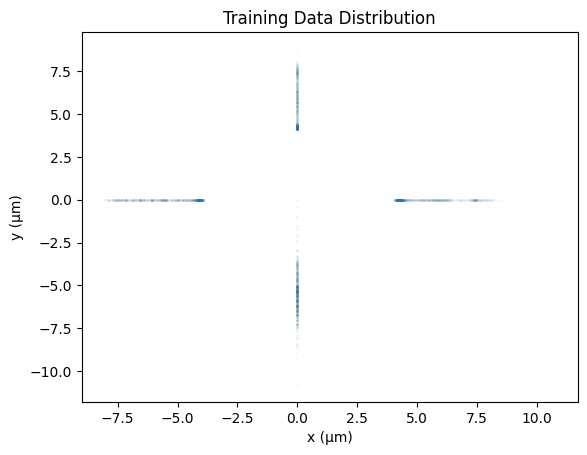

In [4]:
for qb in qbits_train:
    plt.scatter(qb[:, 0], qb[:, 1], color='C0', alpha=0.01, s=2)

plt.title("Training Data Distribution")
plt.xlabel("x (µm)")
plt.ylabel("y (µm)")

plt.show()

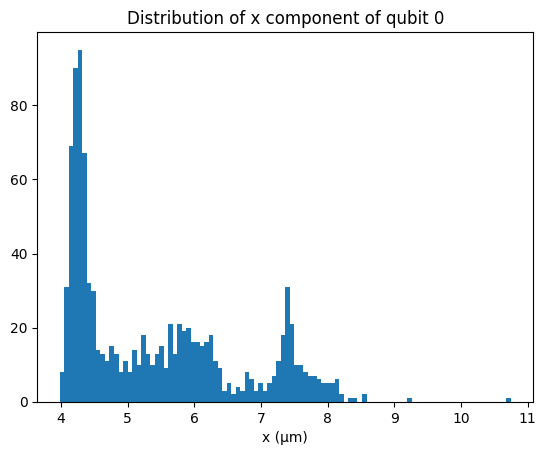

In [5]:
plt.title("Distribution of x component of qubit 0")
plt.hist([d[:, 0][0].item() for d in qbits_train], bins=100)
plt.xlabel("x (µm)")
plt.show()

In [6]:
def get_qbit_distances(qbit_coords):
    d_ij = []
    for i in range(0, n_features-1):
        for j in range(i+1, n_features):
            d_ij.append( np.linalg.norm(qbit_coords[i] - qbit_coords[j]) )
    return np.array(d_ij)

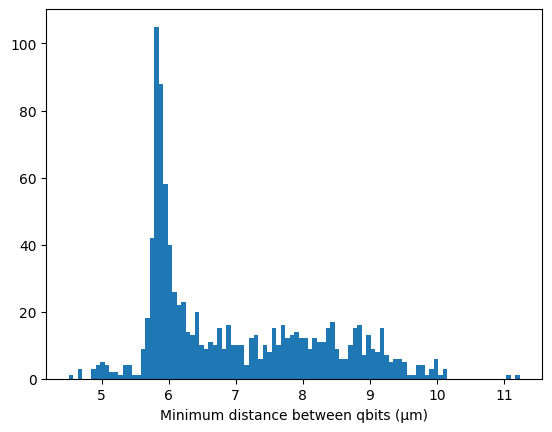

In [7]:
dists_train = np.array([get_qbit_distances(q) for q in qbits_train])

plt.hist(np.min(dists_train, 1), bins=100)
plt.xlabel("Minimum distance between qbits (µm)")
plt.show()